In [711]:
import pandas as pd
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [712]:
df = pd.read_csv('data/Gia SMP va SMPcap 2021(Giá thị trường SMP).csv', encoding = "ISO-8859-1", delimiter=';')
df.head()

,Ngày,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,01/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5


In [713]:
df = df[['Ngày','16','17','18']]
df

,Ngày,16,17,18
0,01/01/2021,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4
3,01/04/2021,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5
...,...,...,...,...
360,27/12/2021,1002.1,1002.1,1002.1
361,28/12/2021,1002.0,1002.0,1002.0
362,29/12/2021,1061.5,1061.5,1061.5
363,30/12/2021,1022.6,1022.6,1022.6


### EDA

In [714]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ngày    365 non-null    object 
 1   16      365 non-null    float64
 2   17      365 non-null    float64
 3   18      365 non-null    float64
dtypes: float64(3), object(1)
memory usage: 11.5+ KB


In [715]:
df.isnull().sum()

Ngày    0
16      0
17      0
18      0
dtype: int64

In [716]:
df.head(5)

,Ngày,16,17,18
0,01/01/2021,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4
3,01/04/2021,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5


In [717]:
df.tail(5)

,Ngày,16,17,18
360,27/12/2021,1002.1,1002.1,1002.1
361,28/12/2021,1002.0,1002.0,1002.0
362,29/12/2021,1061.5,1061.5,1061.5
363,30/12/2021,1022.6,1022.6,1022.6
364,31/12/2021,1022.6,1022.6,1022.6


In [718]:
df.dtypes

Ngày     object
16      float64
17      float64
18      float64
dtype: object

In [719]:
df.dtypes

Ngày     object
16      float64
17      float64
18      float64
dtype: object

In [720]:
df = df.rename(columns={'Ngày': 'Date'})
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.set_index('Date', inplace=True)
df

,16,17,18
Date,,,
2021-01-01,964.4,964.4,964.4
2021-02-01,1019.7,1019.7,1019.7
2021-03-01,988.4,988.4,988.4
2021-04-01,1010.8,1010.8,1010.8
2021-05-01,1061.5,1061.5,1061.5
...,...,...,...
2021-12-27,1002.1,1002.1,1002.1
2021-12-28,1002.0,1002.0,1002.0
2021-12-29,1061.5,1061.5,1061.5


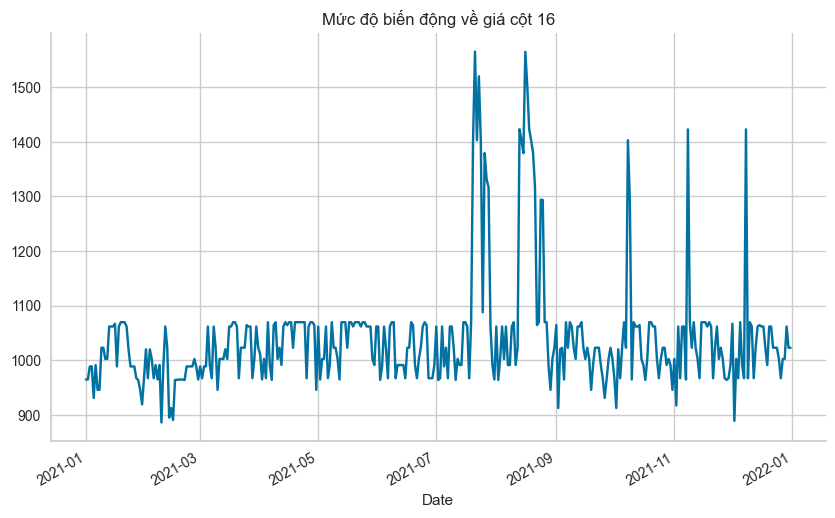

In [721]:
plt.figure(figsize=(6,10))
df['16'].plot(kind='line', figsize=(10, 6), title='Mức độ biến động về giá cột 16')
plt.gca().spines[['top', 'right']].set_visible(False)

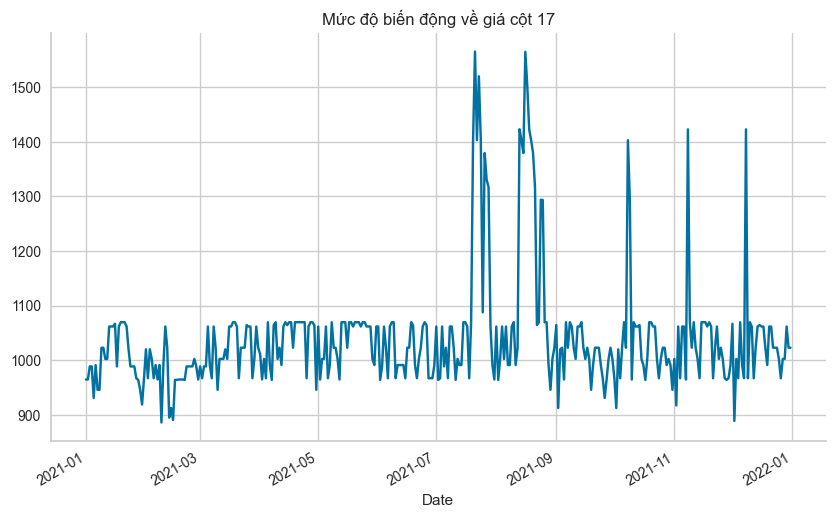

In [722]:
plt.figure(figsize=(6,10))
df['17'].plot(kind='line', figsize=(10, 6), title='Mức độ biến động về giá cột 17')
plt.gca().spines[['top', 'right']].set_visible(False)

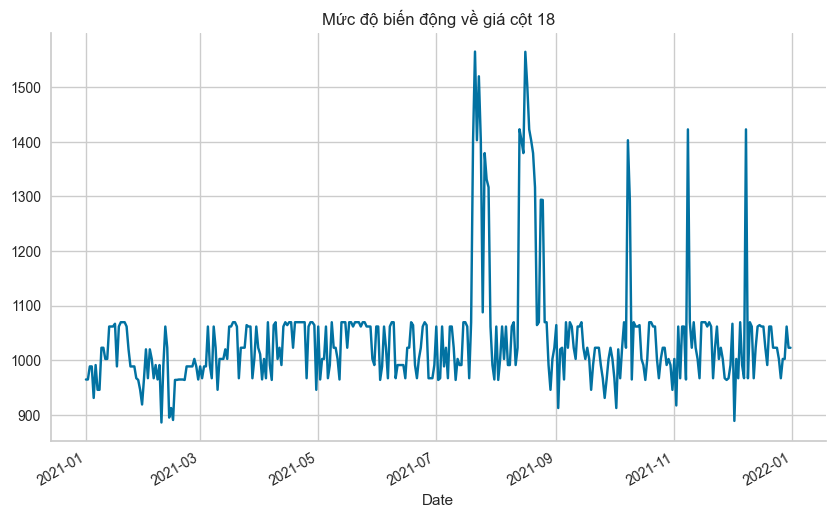

In [723]:
plt.figure(figsize=(6,10))
df['18'].plot(kind='line', figsize=(10, 6), title='Mức độ biến động về giá cột 18')
plt.gca().spines[['top', 'right']].set_visible(False)

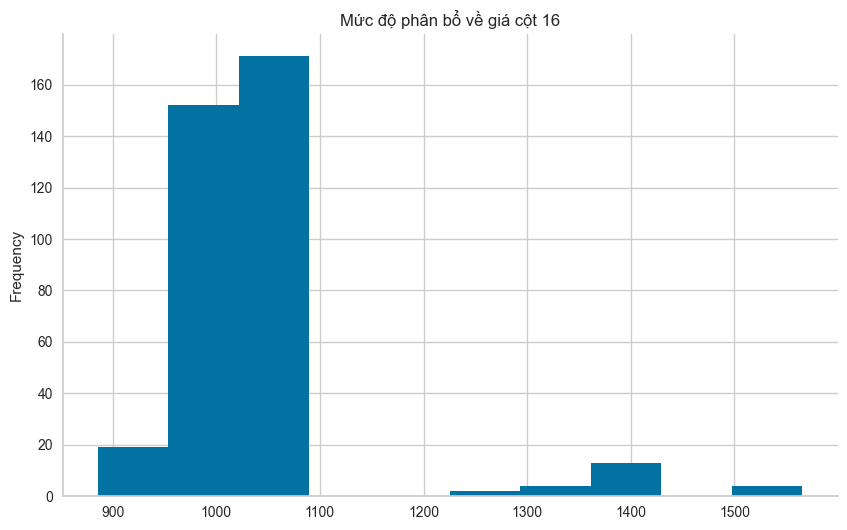

In [724]:
plt.figure(figsize=(6,10))
df['16'].plot(kind='hist', figsize=(10, 6), title='Mức độ phân bổ về giá cột 16')
plt.gca().spines[['top', 'right']].set_visible(False)

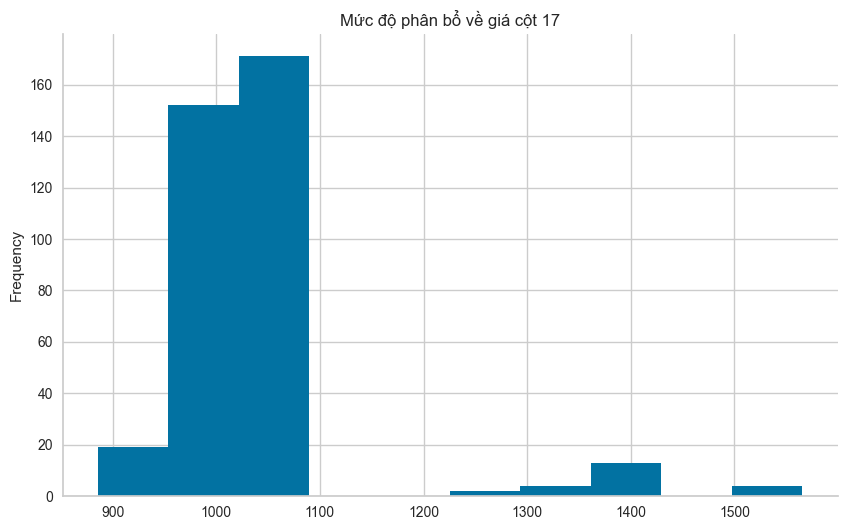

In [725]:
plt.figure(figsize=(6,10))
df['17'].plot(kind='hist', figsize=(10, 6), title='Mức độ phân bổ về giá cột 17')
plt.gca().spines[['top', 'right']].set_visible(False)

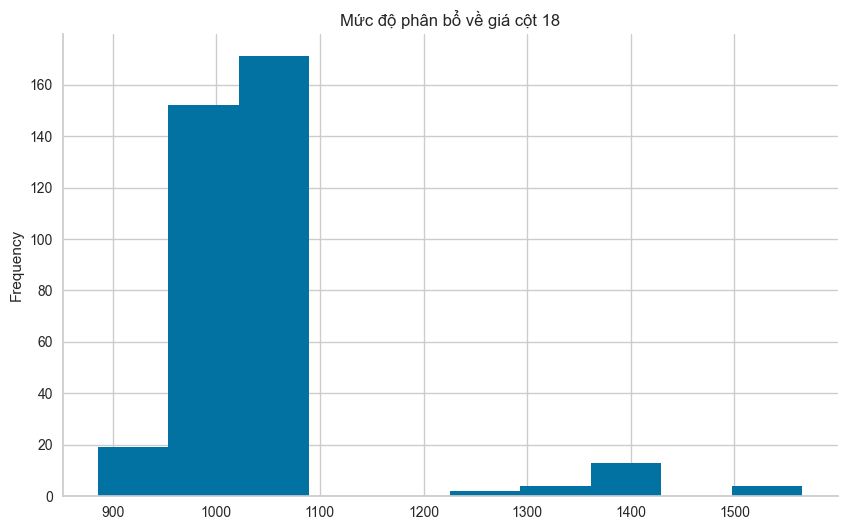

In [726]:
plt.figure(figsize=(6,10))
df['18'].plot(kind='hist', figsize=(10, 6), title='Mức độ phân bổ về giá cột 18')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: >

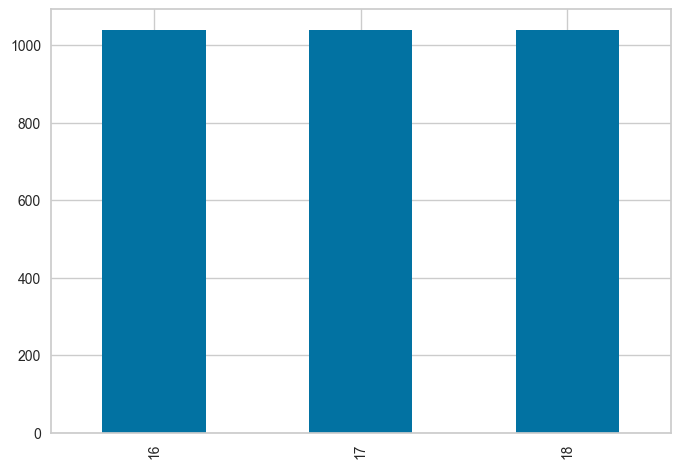

In [727]:
df[['16', '17', '18']].mean().plot(kind='bar')

### Kalman


In [728]:
# from pykalman import KalmanFilter
# import numpy as np
# kf = KalmanFilter(transition_matrices =[[1, 1], [0, 1]], observation_matrices = [[0.1, 0.5], [-0.3, 0.0]])
# measurements = np.asarray(df)  # 3 observations
# kf = kf.em(measurements, n_iter=5)
# (filtered_state_means, filtered_state_covariances) = kf.filter(measurements)
# (smoothed_state_means, smoothed_state_covariances) = kf.smooth(measurements)

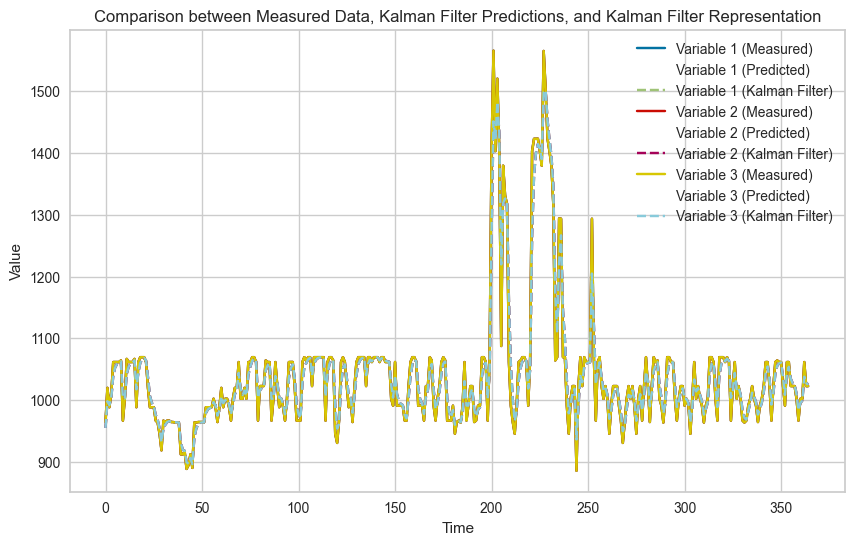

In [729]:
from pykalman import KalmanFilter
import numpy as np

data = np.array(df[['16', '17', '18']])

kf = KalmanFilter(
    initial_state_mean=np.zeros(3),  # Giả sử trạng thái ban đầu là [0, 0, 0]
    initial_state_covariance=np.eye(3),
    observation_matrices=np.eye(3),  # Mỗi biến trạng thái đều được quan sát trực tiếp
    observation_covariance=np.eye(3) * 0.01,  # Ma trận hiệp phương sai của quá trình đo lường
    transition_matrices=np.eye(3),  # Không có sự thay đổi trong trạng thái
    transition_covariance=np.eye(3) * 0.01,  # Ma trận hiệp phương sai của quá trình dự báo
)

# Áp dụng filter lên dữ liệu để ước lượng trạng thái
state_means, _ = kf.filter(data)

predicted_state_means, _ = kf.filter_update(state_means[-1], kf.transition_covariance)

plt.figure(figsize=(10, 6))
for i in range(3):  # Vẽ từng biến trạng thái
    plt.plot(data[:, i], label=f'Variable {i+1} (Measured)')
    plt.plot(range(len(data), len(data) + 1), predicted_state_means[i], 'rx', label=f'Variable {i+1} (Predicted)')
    plt.plot(state_means[:, i], label=f'Variable {i+1} (Kalman Filter)', linestyle='--')  # Đường biểu diễn của Kalman Filter
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Comparison between Measured Data, Kalman Filter Predictions, and Kalman Filter Representation')
plt.legend()
plt.grid(True)
plt.show()

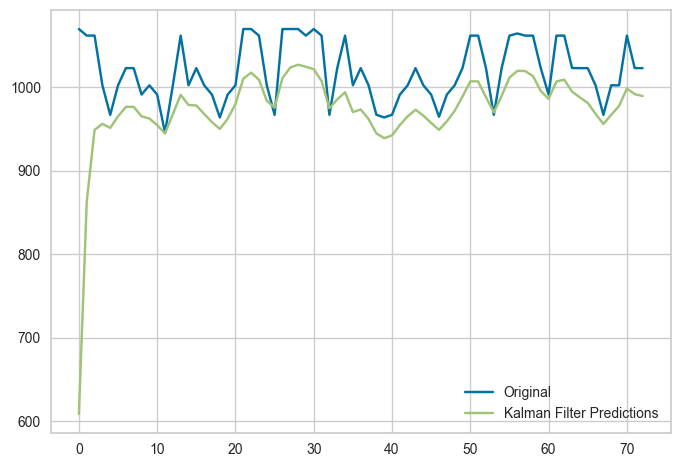

In [730]:
test_size = 0.2 * df.shape[0]
test_size = int(test_size)

from pykalman import KalmanFilter

kf = KalmanFilter(initial_state_mean=0, n_dim_obs=3)

kf = kf.em(df.values[:-test_size], n_iter=10)

state_means, state_covariances = kf.smooth(df.values[-test_size:])

plt.plot(df.values[-test_size:][:,0], label='Original')
plt.plot(state_means, label='Kalman Filter Predictions')
plt.legend()
plt.show()

### Gaussian Mixture

In [731]:
transformer = StandardScaler()
X = transformer.fit_transform(df[['16', '17', '18']])
X

array([[-0.72311218, -0.72310607, -0.72309985],
       [-0.1964422 , -0.19643864, -0.19643315],
       [-0.49453931, -0.49453431, -0.49452841],
       ...,
       [ 0.20165554,  0.20165717,  0.20166211],
       [-0.16882298, -0.16881955, -0.1688141 ],
       [-0.16882298, -0.16881955, -0.1688141 ]])

Elbow Method to determine the number of clusters to be formed:


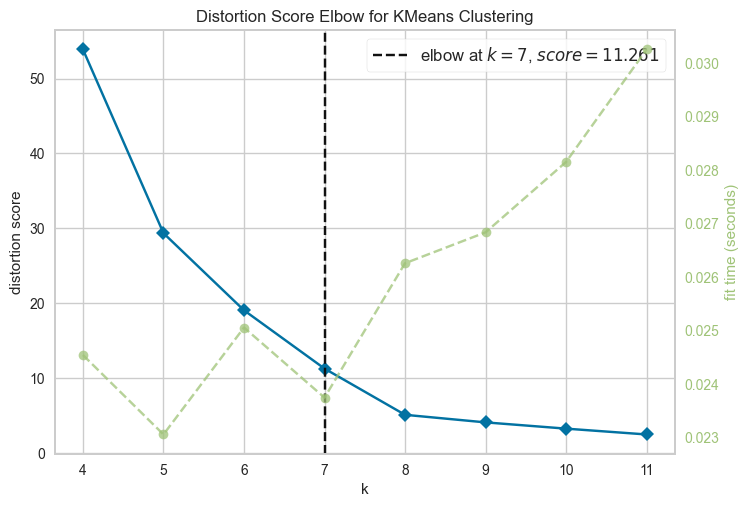

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [732]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state=23, n_init=10), k=(4,12))
Elbow_M.fit(X)
Elbow_M.show()

In [733]:
GM = GaussianMixture(n_components=8,covariance_type='full',random_state=1,n_init=15)
# fit model and predict clusters
preds = GM.fit_predict(X)
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= preds

In [734]:
cluster_counts = df['Clusters'].value_counts().sort_index(ascending=True)

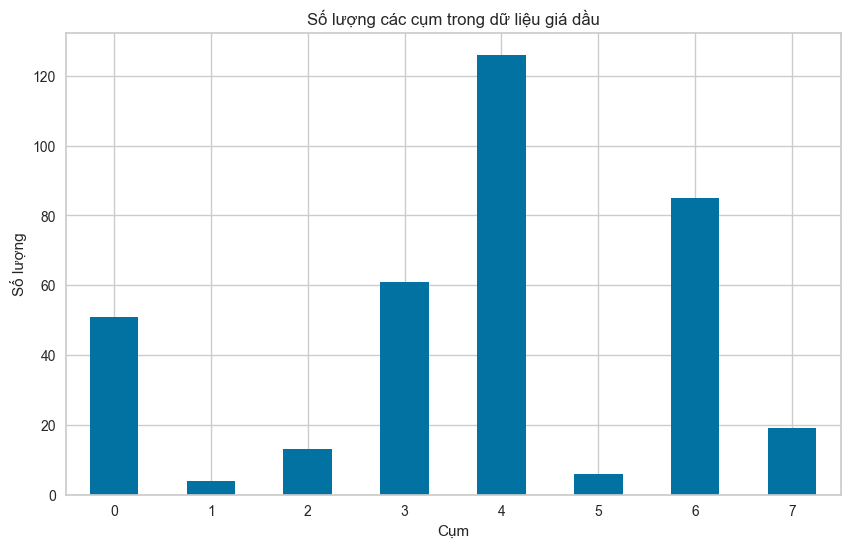

In [735]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar')
plt.xlabel('Cụm')
plt.ylabel('Số lượng')
plt.title('Số lượng các cụm trong dữ liệu giá dầu')
plt.xticks(rotation=0)
plt.show()


### Prophet

In [736]:
X = pd.DataFrame(df['16'])
X = X.reset_index()
X = X.rename(columns={'Date': 'ds', '16': 'y'})
X

,ds,y
0,2021-01-01,964.4
1,2021-02-01,1019.7
2,2021-03-01,988.4
3,2021-04-01,1010.8
4,2021-05-01,1061.5
...,...,...
360,2021-12-27,1002.1
361,2021-12-28,1002.0
362,2021-12-29,1061.5
363,2021-12-30,1022.6


In [737]:
from prophet import Prophet
model = Prophet(interval_width=0.95)
model.fit(X)

12:15:04 - cmdstanpy - INFO - Chain [1] start processing
12:15:04 - cmdstanpy - INFO - Chain [1] done processing


In [738]:
future = model.make_future_dataframe(periods=15)
future.tail(30)

,ds
350,2021-12-17
351,2021-12-18
352,2021-12-19
353,2021-12-20
354,2021-12-21
355,2021-12-22
356,2021-12-23
357,2021-12-24
358,2021-12-25
359,2021-12-26


In [739]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
375,2022-01-11,1010.916361,828.994966,1195.750089
376,2022-01-12,1026.535829,834.441039,1219.579764
377,2022-01-13,1001.364727,818.523656,1196.209497
378,2022-01-14,1019.321700,823.029649,1209.909274
379,2022-01-15,999.097431,805.802182,1179.728490


In [740]:
forecast = model.make_future_dataframe(periods=30)
forecast = model.predict(forecast)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,973.850585,794.302567,1166.289475,973.850585,973.850585,17.001536,17.001536,17.001536,17.001536,17.001536,17.001536,0.0,0.0,0.0,990.852121
1,2021-01-02,974.395340,788.626986,1153.588996,974.395340,974.395340,-2.653954,-2.653954,-2.653954,-2.653954,-2.653954,-2.653954,0.0,0.0,0.0,971.741387
2,2021-01-03,974.940096,720.408655,1114.945034,974.940096,974.940096,-44.671153,-44.671153,-44.671153,-44.671153,-44.671153,-44.671153,0.0,0.0,0.0,930.268943
3,2021-01-04,975.484851,766.940171,1171.171187,975.484851,975.484851,1.879828,1.879828,1.879828,1.879828,1.879828,1.879828,0.0,0.0,0.0,977.364679
4,2021-01-05,976.029606,800.721247,1174.852327,976.029606,976.029606,6.889856,6.889856,6.889856,6.889856,6.889856,6.889856,0.0,0.0,0.0,982.919462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2022-01-26,995.494803,833.444372,1192.802386,992.926147,998.468335,23.078104,23.078104,23.078104,23.078104,23.078104,23.078104,0.0,0.0,0.0,1018.572907
391,2022-01-27,994.926023,813.045617,1171.145375,992.221059,998.078894,-1.524218,-1.524218,-1.524218,-1.524218,-1.524218,-1.524218,0.0,0.0,0.0,993.401805
392,2022-01-28,994.357243,818.312244,1197.488123,991.517676,997.658230,17.001536,17.001536,17.001536,17.001536,17.001536,17.001536,0.0,0.0,0.0,1011.358778
393,2022-01-29,993.788462,797.093631,1178.043103,990.789708,997.238355,-2.653954,-2.653954,-2.653954,-2.653954,-2.653954,-2.653954,0.0,0.0,0.0,991.134509
